<a href="https://colab.research.google.com/github/ShumengJ/ECEGY6143-ML-Archive/blob/main/2_advertising_hw_solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solutions: Linear regression on the Advertising data

Fraida Fund

In [ ]:
import pandas as pd
import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets


## 1. Read in and pre-process data

Read in the "Advertising" data, and make sure it is loaded correctly. Visually inspect the data using a pairplot, and note any meaningful observations. In particular, comment on which features appear to be correlated with product sales, and which features appear to be correlated with one another. Then, split the data into training data (70%) and test data (30%).

### Read in data

In [ ]:
url = 'https://www.statlearning.com/s/Advertising.csv'
df = pd.read_csv(url, index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Pairplot

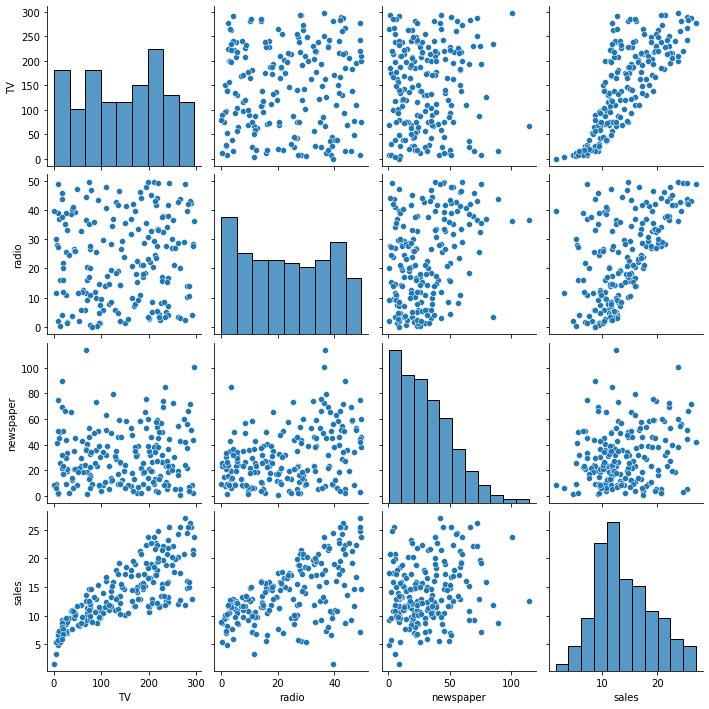

In [ ]:
sns.pairplot(df);

### Comments on data

It appears from the bottom row, which shows sales on the vertical axis and each type of advertising on the horizontal axis, that each type of advertising - TV, radio, and newspaper - *potentially* has a positive effect on sales.

* There appears to be a positive relationship between TV ads and sales.
* There also appears to be a positive relationship between radio ads and sales, but it's not as "tight".
* And there may or may not be a positive relationship between newspapers ads and sales, it's difficult to see one visually.

There isn't any obvious visual correlation between the budgets for most types of advertising.  There appears to be a slight correlation between newspaper ad budgets and other ad budgets, but it's difficult to be sure from a visual inspection.

### Split data

In [ ]:
train, test = train_test_split(df, test_size=0.3)

## 2. Fit simple linear regression models

Use the training data to fit a simple (univariate) linear regression to predict product sales, for each of three features: TV ad budget, radio ad budget, and newspaper ad budget. In other words, you will fit three regression models, with each model being trained on one feature. For each of the three regression models, create a plot of the data and the regression line, with product sales ($y$) on the vertical axis and the feature on which the model was trained ($x$) on the horizontal axis. (You can include both the training and test data in the plots, but use one color for training data and another color for test data.)

Also, for each regression model, print the intercept and coefficients, and compute the MSE and R2 on the training data, and MSE and R2 on the test data.

Comment on the results. Which type of ads seems to have the greatest effect on product sales? Which regression model is most effective at predicting product sales?


### Simple linear regressions

In [ ]:
reg_tv = LinearRegression().fit(train[['TV']], train['sales'])
reg_radio = LinearRegression().fit(train[['radio']], train['sales'])
reg_news = LinearRegression().fit(train[['newspaper']], train['sales'])


###  Intercept and coefficients

In [ ]:
print("TV: ", reg_tv.coef_[0], reg_tv.intercept_)
print("Radio: ", reg_radio.coef_[0], reg_radio.intercept_)
print("Newspaper: ", reg_news.coef_[0], reg_news.intercept_)

TV:  0.0494073399119794 6.916367345119314
Radio:  0.20960672856071896 9.088493452391374
Newspaper:  0.046985841175701974 12.732163614182893


###  Plot of data and regression line


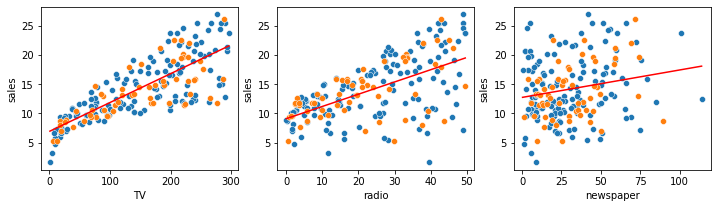

In [ ]:
fig = plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
sns.scatterplot(data=train, x="TV", y="sales");
sns.scatterplot(data=test, x="TV", y="sales");

sns.lineplot(data=train, x="TV", y=reg_tv.predict(train[['TV']]), color='red');

plt.subplot(1,3,2)
sns.scatterplot(data=train, x="radio", y="sales");
sns.scatterplot(data=test, x="radio", y="sales");

sns.lineplot(data=train, x="radio", y=reg_radio.predict(train[['radio']]), color='red');

plt.subplot(1,3,3)
sns.scatterplot(data=train, x="newspaper", y="sales");
sns.scatterplot(data=test, x="newspaper", y="sales");

sns.lineplot(data=train, x="newspaper", y=reg_news.predict(train[['newspaper']]), color='red');


###  MSE and R2

In [ ]:
y_pred_tv = reg_tv.predict(test[['TV']])
y_pred_radio = reg_radio.predict(test[['radio']])
y_pred_news = reg_news.predict(test[['newspaper']])
y_pred_train_tv = reg_tv.predict(train[['TV']])
y_pred_train_radio = reg_radio.predict(train[['radio']])
y_pred_train_news = reg_news.predict(train[['newspaper']])


#### Training R2

In [ ]:
r2_tv = 1-np.mean( (y_pred_train_tv - train['sales'])**2 ) / np.std(train['sales'])**2
r2_radio = 1-np.mean( (y_pred_train_radio - train['sales'])**2 ) / np.std(train['sales'])**2
r2_news = 1-np.mean( (y_pred_train_news - train['sales'])**2 ) / np.std(train['sales'])**2
print("TV: ", r2_tv)
print("Radio: ", r2_radio)
print("Newspaper: ", r2_news)

TV:  0.6339012731229536
Radio:  0.3349214819492249
Newspaper:  0.03747445991166465


#### Training MSE

In [ ]:
mse_tv = np.mean( (y_pred_train_tv - train['sales'])**2  )
mse_radio = np.mean( (y_pred_train_radio - train['sales'])**2  )
mse_news = np.mean( (y_pred_train_news - train['sales'])**2  )
print("TV: ", mse_tv)
print("Radio: ", mse_radio)
print("Newspaper: ", mse_news)

TV:  10.871692262184245
Radio:  19.750216123712274
Newspaper:  28.58322277052736


#### Test R2

In [ ]:
r2_tv = 1-np.mean( (y_pred_tv - test['sales'])**2 / np.std(test['sales'])**2 )
r2_radio = 1-np.mean( (y_pred_radio - test['sales'])**2 / np.std(test['sales'])**2 )
r2_news = 1-np.mean( (y_pred_news - test['sales'])**2 / np.std(test['sales'])**2 )
print("TV: ", r2_tv)
print("Radio: ", r2_radio)
print("Newspaper: ", r2_news)

TV:  0.528161991388219
Radio:  0.31594882022669446
Newspaper:  0.08697106269553967


#### Test MSE

In [ ]:
mse_tv = np.mean( (y_pred_tv - test['sales'])**2  )
mse_radio = np.mean( (y_pred_radio - test['sales'])**2  )
mse_news = np.mean( (y_pred_news - test['sales'])**2  )
print("TV: ", mse_tv)
print("Radio: ", mse_radio)
print("Newspaper: ", mse_news)

TV:  9.84455403514516
Radio:  14.272226228438189
Newspaper:  19.049679222303553


### Comments on simple linear regression results

Radio ads seem to have the greatest effect on product sales, since the coefficient for the radio feature is greatest. (Note that all the features are on the same scale - thousands of dollars - so they are comparable).


However, the TV regression model is most effective at predicting sales - the R2 for the TV regression is highest.

## 3. Explore the residuals for the single linear regression models

Create some additional plots as described below to help you identify any problems with the regression. You can include both test and training data in these plots, but use one color for training data and a different color for test data:

* For each of the three regression models, plot predicted sales ($\hat{y}$) on the vertical axis, and actual sales ($y$) on the horizontal axis. Make sure both axes use the same scale. Comment on your observations. What would you expect this plot to look like for a model that explains the data well?
* For each of the three regression models, compute the residuals ($y - \hat{y}$). Note that some of these will be negative, and some will be positive. What is the mean residual for each of the regression models? What should be the mean residual for a well-fitted regression model? Explain your answer.
* For each of the three regression models, plot the residuals ($y - \hat{y}$) on the vertical axis, and actual sales ($y$) on the horizontal axis. Use the same scale for all three subplots. Comment on your observations. Is there a pattern in the residuals (and if so, what does it indicate), or do they appear to have no pattern with respect to actual sales?
* For each of the three regression models AND each of the three features, plot the residuals ($y - \hat{y}$) on the vertical axis, and the feature ($x$) on the horizontal axis. This plot will include nine subplots in total. Make sure to clearly label each axis, and also label each subplot with a title that indicates which regression model it uses. Is there a pattern in the residuals (and if so, what does it indicate), or do they appear to have no pattern with respect to each of the three features?


### Plot of predicted vs. actual sales

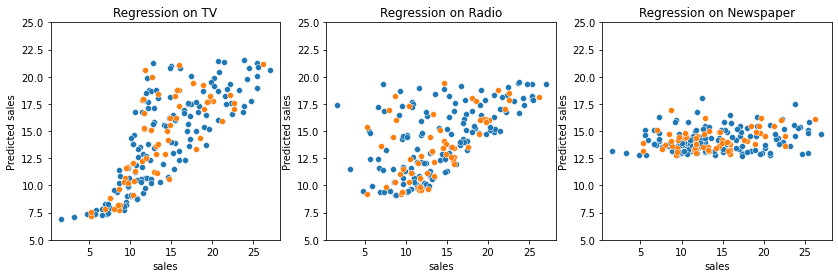

In [ ]:
fig = plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.scatterplot(data=train, x="sales", y=reg_tv.predict(train[['TV']]));
sns.scatterplot(data=test, x="sales", y=reg_tv.predict(test[['TV']]));

plt.ylabel('Predicted sales');
plt.ylim(5,25);
plt.title("Regression on TV");

plt.subplot(1,3,2)
sns.scatterplot(data=train, x="sales", y=reg_radio.predict(train[['radio']]));
sns.scatterplot(data=test, x="sales", y=reg_radio.predict(test[['radio']]));
plt.ylabel('Predicted sales');
plt.ylim(5,25);
plt.title("Regression on Radio");

plt.subplot(1,3,3)
sns.scatterplot(data=train, x="sales", y=reg_news.predict(train[['newspaper']]));
sns.scatterplot(data=test, x="sales", y=reg_news.predict(test[['newspaper']]));
plt.ylabel('Predicted sales');
plt.ylim(5,25);
plt.title("Regression on Newspaper");


### Comment on predicted vs. actual sales

For a model that fits the data very well, the plot of predicted vs. actual sales should show points along the line $y=x$.

For our regression models,


* The TV regression fits the data best - the predicted vs. actual plot is most similar to the line $y=x$.
* The radio regression does not fit the data as well.
* The regression on newspaper is the worst fit. The predicted sales is approximately 13-15 thousands of units for almost all samples (moderate sales), where the actual data includes sales in the range of 5-25 thousands of units.

### Compute residuals

In [ ]:
residual_tv_train = train['sales'] - reg_tv.predict(train[['TV']])
residual_news_train = train['sales'] -  reg_news.predict(train[['newspaper']])
residual_radio_train = train['sales'] -  reg_radio.predict(train[['radio']])


In [ ]:
residual_tv_test = test['sales'] - reg_tv.predict(test[['TV']])
residual_news_test = test['sales'] -  reg_news.predict(test[['newspaper']])
residual_radio_test = test['sales'] -  reg_radio.predict(test[['radio']])


### Mean residuals

In [ ]:
print("Mean residual for TV regression, training data:        ", np.mean(residual_tv_train))
print("Mean residual for radio regression, training data:     ", np.mean(residual_radio_train))
print("Mean residual for newspaper regression, training data: ", np.mean(residual_news_train))

Mean residual for TV regression, training data:         -2.5376526277146434e-16
Mean residual for radio regression, training data:      3.9333615729576973e-16
Mean residual for newspaper regression, training data:  -5.202187886815019e-16


In [ ]:
print("Mean residual for TV regression, test data:        ", np.mean(residual_tv_test))
print("Mean residual for radio regression, test data:     ", np.mean(residual_news_test))
print("Mean residual for newspaper regression, test data: ", np.mean(residual_radio_test))

Mean residual for TV regression, test data:         -0.5294870804218168
Mean residual for radio regression, test data:      -0.4842300182176357
Mean residual for newspaper regression, test data:  0.19238538124019985


### Comment on residuals

For a well-fitted model, the mean of the residuals should be close to 0, indicating that *on average*, the model does not consistently over-estimate or under-estimate the target variable.

Here, the mean of residuals is close to zero, so it doesn't suggest any obvious problem with our model.

### Plot of residuals against actual sales

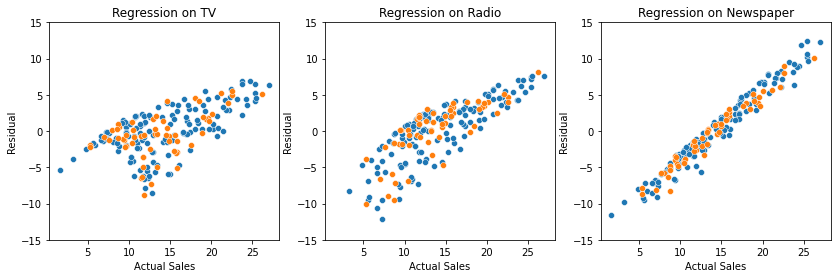

In [ ]:
fig = plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.scatterplot(x=train['sales'], y=residual_tv_train);
sns.scatterplot(x=test['sales'], y=residual_tv_test);
plt.xlabel('Actual Sales')
plt.ylabel('Residual');
plt.ylim(-15, 15)
plt.title("Regression on TV");

plt.subplot(1,3,2)
sns.scatterplot(x=train['sales'], y=residual_radio_train);
sns.scatterplot(x=test['sales'], y=residual_radio_test);
plt.xlabel('Actual Sales')
plt.ylabel('Residual');
plt.ylim(-15, 15)
plt.title("Regression on Radio");

plt.subplot(1,3,3)
sns.scatterplot(x=train['sales'], y=residual_news_train);
sns.scatterplot(x=test['sales'], y=residual_news_test);
plt.xlabel('Actual Sales')
plt.ylabel('Residual');
plt.ylim(-15, 15)
plt.title("Regression on Newspaper");


### Comments on plot of residuals against actual sales

If a model captures everything "learnable" about the target variable, the residual plot should have no obvious pattern, since the error term will just be due to random noise that is not "learnable". A pattern in the residuals suggests that the model does *not* capture everything "learnable" about the target variable.

There is a pattern in the residuals (for all three regression models, but especially for the regression on newspaper, where there is a very obvious linear pattern). This suggests something "learnable" that isn't captured by our model.

### Plot of residuals against features

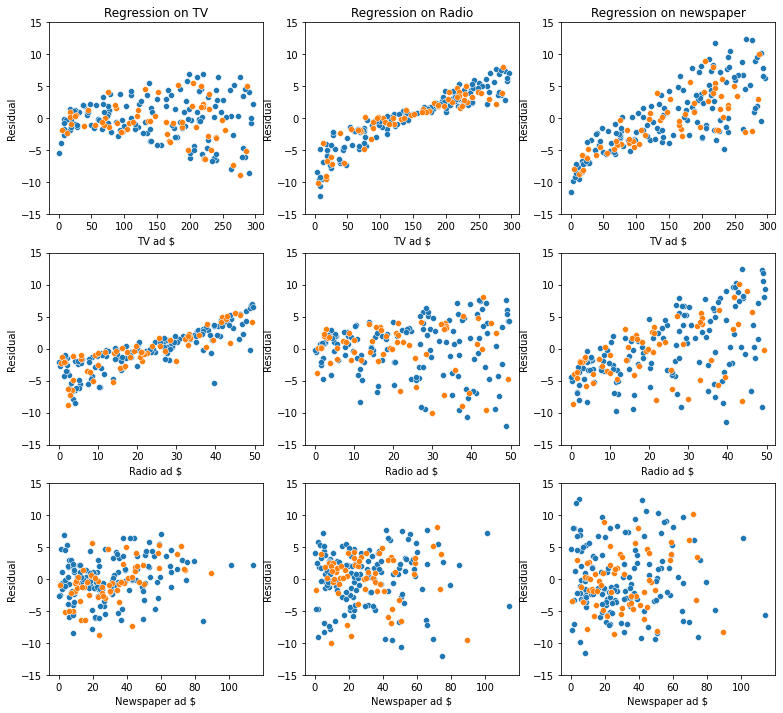

In [ ]:
plt.figure(figsize=(13,12))

plt.subplot(3,3,1)
sns.scatterplot(x=train['TV'], y=residual_tv_train);
sns.scatterplot(x=test['TV'], y=residual_tv_test);
plt.xlabel('TV ad $')
plt.ylabel('Residual');
plt.ylim(-15, 15);
plt.title("Regression on TV");

plt.subplot(3,3,2)
sns.scatterplot(x=train['TV'], y=residual_radio_train);
sns.scatterplot(x=test['TV'], y=residual_radio_test);
plt.xlabel('TV ad $')
plt.ylabel('Residual');
plt.ylim(-15, 15);
plt.title("Regression on Radio");

plt.subplot(3,3,3)
sns.scatterplot(x=train['TV'], y=residual_news_train);
sns.scatterplot(x=test['TV'], y=residual_news_test);
plt.xlabel('TV ad $')
plt.ylabel('Residual');
plt.ylim(-15, 15);
plt.title("Regression on newspaper");

plt.subplot(3,3,4)
sns.scatterplot(x=train['radio'], y=residual_tv_train);
sns.scatterplot(x=test['radio'], y=residual_tv_test);
plt.xlabel('Radio ad $')
plt.ylabel('Residual');
plt.ylim(-15, 15);

plt.subplot(3,3,5)
sns.scatterplot(x=train['radio'], y=residual_radio_train);
sns.scatterplot(x=test['radio'], y=residual_radio_test);
plt.xlabel('Radio ad $')
plt.ylabel('Residual');
plt.ylim(-15, 15);

plt.subplot(3,3,6)
sns.scatterplot(x=train['radio'], y=residual_news_train);
sns.scatterplot(x=test['radio'], y=residual_news_test);
plt.xlabel('Radio ad $')
plt.ylabel('Residual');
plt.ylim(-15, 15);

plt.subplot(3,3,7)
sns.scatterplot(x=train['newspaper'], y=residual_tv_train);
sns.scatterplot(x=test['newspaper'], y=residual_tv_test);
plt.xlabel('Newspaper ad $')
plt.ylabel('Residual');
plt.ylim(-15, 15);

plt.subplot(3,3,8)
sns.scatterplot(x=train['newspaper'], y=residual_radio_train);
sns.scatterplot(x=test['newspaper'], y=residual_radio_test);
plt.xlabel('Newspaper ad $')
plt.ylabel('Residual');
plt.ylim(-15, 15);

plt.subplot(3,3,9)
sns.scatterplot(x=train['newspaper'], y=residual_news_train);
sns.scatterplot(x=test['newspaper'], y=residual_news_test);
plt.xlabel('Newspaper ad $')
plt.ylabel('Residual');
plt.ylim(-15, 15);


### Comments on plot of residuals against features

A pattern in the plot of residuals against a feature that is *not* included in the model, suggests that the error in the model is related to the value of that feature.  (This, in turn, suggests that we could improve the model by including that feature in the model.)

* Here, for example, we see a relationship between the error term in the regression on radio, and the TV ad buget. This suggests that we could improve the regression on radio model by including the TV ad budget as a feature.

* We also see a relationship in the error term of regression on TV vs. radio budget, and in the error term of regression on newspaper vs. TV budget and vs. radio budget.

* All of the above suggests that to predict sales, a model should include both TV and radio budgets. (Newspaper budgets appear to be less predictive.)


A non-linear pattern in the plot of residuals against a feature that *is* included in the model, suggests that the error in the model is related to a non-linear function of that feature.  (This, in turn, suggests that we could improve the model by including a *transformed* version of that feature in the model.)

* Here, we see in the top-left plot, that the TV model residuals seem to be related to the value of the TV feature by some non-linear relationship.

## 4. Try a multiple linear regression

Next, fit a multiple linear regression to predict product sales, using all three features to train a single model: TV ad budget, radio ad budget, and newspaper ad budget.

Print the intercept and coefficients, and compute the MSE and R2 on the training data, and MSE and R2 on the test data. Comment on the results. Make sure to explain any differences between the coefficients of the multiple regression model, and the coefficients of the three simple linear regression models.

Also repeat the analysis of part (3) for this regression model:

* Plot predicted sales ($\hat{y}$) on the vertical axis, and actual sales ($y$) on the horizontal axis. Make sure both axes use the same scale. Comment on your observations. What would you expect this plot to look like for a model that explains the data well?
* Compute the residuals ($y - \hat{y}$). What is the mean of the residuals? What should be the mean of the residuals for a well-fitted regression model? Explain your answer.
* Plot the residuals ($y - \hat{y}$) on the vertical axis, and actual sales ($y$) on the horizontal axis. Comment on your observations. Is there a pattern in the residuals (and if so, what does it indicate), or do they appear to have no pattern with respect to actual sales?
* For each of the three features, plot the residuals ($y - \hat{y}$) on the vertical axis, and the feature ($x$) on the horizontal axis. Make sure to clearly label each axis. Is there a pattern in the residuals (and if so, what does it indicate), or do they appear to have no pattern with respect to each of the three features?


### Multiple linear regression

In [ ]:
reg_multi_ad = LinearRegression().fit(train[['TV', 'radio', 'newspaper']], train['sales'])
print("Coefficients (TV, radio, newspaper):", reg_multi_ad.coef_)
print("Intercept: ", reg_multi_ad.intercept_)

Coefficients (TV, radio, newspaper): [ 0.0469943   0.1903749  -0.00404789]
Intercept:  2.7930444059092903


### MSE and R2

In [ ]:
y_pred_multi_ad = reg_multi_ad.predict(test[['TV', 'radio', 'newspaper']])

r2_multi_ad = 1-np.mean( (y_pred_multi_ad - test['sales'])**2 / np.std(test['sales'])**2 )
mse_multi_ad = np.mean( (y_pred_multi_ad - test['sales'])**2 )

print("Multiple regression test R2 : ", r2_multi_ad)
print("Multiple regression test MSE: ", mse_multi_ad)

Multiple regression test R2 :  0.8720050092025802
Multiple regression test MSE:  2.6705216199949144


In [ ]:
y_pred_multi_ad_train = reg_multi_ad.predict(train[['TV', 'radio', 'newspaper']])

r2_multi_ad_train = 1-np.mean( (y_pred_multi_ad_train - train['sales'])**2 / np.std(train['sales'])**2 )
mse_multi_ad_train = np.mean( (y_pred_multi_ad_train - train['sales'])**2 )

print("Multiple regression training R2 : ", r2_multi_ad_train)
print("Multiple regression training MSE: ", mse_multi_ad_train)

Multiple regression training R2 :  0.9039049735462839
Multiple regression training MSE:  2.853644328247343


### Comment on multiple linear regression results

The multiple linear regression is much more effective at predicting sales (higher R2) than any of the individual simple linear regressions.

The coefficients for TV, radio, and newspaper ads are different than they had been in the single regression case. In particular, we previously estimated that newspaper ads was associated with a positive effect on sales, similar in magnitude to TV ads. Now, the newspaper ads are estimated as having an association much closer to zero.

This is because:

* In the simple regression case, the coefficent for newspaper ads represents the effect of an increase in newspaper advertising.
* In the multiple regression case, the coefficient for newspaper ads represents the effect of an increase in newspaper advertising while holding TV and radio advertising constant.



In [ ]:
x = np.column_stack([train['TV'], train['radio'], train['newspaper']])
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(x, i) for i in range(x.shape[1])]
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[2.533447255210852, 3.0895614238480196, 2.755772272764082]

In [ ]:
np.corrcoef(x, rowvar=False)

array([[1.        , 0.07645264, 0.0779609 ],
       [0.07645264, 1.        , 0.28769814],
       [0.0779609 , 0.28769814, 1.        ]])

### Plot of predicted vs. actual sales

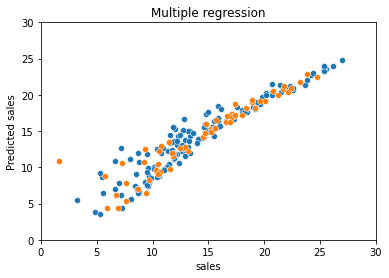

In [ ]:
sns.scatterplot(data=train, x="sales", y=reg_multi_ad.predict(train[['TV', 'radio', 'newspaper']]));
sns.scatterplot(data=test, x="sales", y=reg_multi_ad.predict(test[['TV', 'radio', 'newspaper']]));

plt.ylabel('Predicted sales');
plt.ylim(0,30);
plt.xlim(0,30);
plt.title("Multiple regression");



### Comment on predicted vs. actual sales

For a model that fits the data very well, the plot of predicted vs. actual sales should show points along the line $y=x$.

For our multiple regresion model, the fit seems mostly good, but not as "tight" along $y=x$ as we might like to see.


### Compute residuals

In [ ]:
residual_multi_train = train['sales'] - reg_multi_ad.predict(train[['TV', 'radio', 'newspaper']])
residual_multi_test = test['sales'] - reg_multi_ad.predict(test[['TV', 'radio', 'newspaper']])


### Mean residuals

In [ ]:
print("Mean of residuals for training data: ", np.mean(residual_multi_train))
print("Mean of residuals for test data: ", np.mean(residual_multi_test))

Mean of residuals for training data:  -3.172065784643304e-17
Mean of residuals for test data:  0.07426690211176384


### Comment on residuals

For a well-fitted model, the mean of the residuals should be close to 0, indicating that *on average*, the model does not consistently over-estimate or under-estimate the target variable.

Here, the mean of residuals is close to zero, so it doesn't suggest any obvious problem with our model.

### Plot of residuals against actual sales

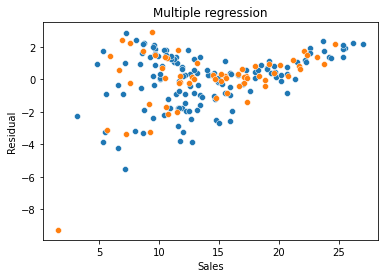

In [ ]:
sns.scatterplot(x=train['sales'], y=residual_multi_train);
sns.scatterplot(x=test['sales'], y=residual_multi_test);

plt.xlabel('Sales')
plt.ylabel('Residual');
plt.title("Multiple regression");


### Comments on plot of residuals against actual sales

If a model captures everything "learnable" about the target variable, the residual plot should have no obvious pattern, since the error term will just be due to random noise that is not "learnable". A pattern in the residuals suggests that the model does *not* capture everything "learnable" about the target variable.

Here, we see a slight U-shaped pattern in the residuals, which suggests that sales may not be purely a linear function of our three features. We may be able to improve the model by adding non-linear transformation of features.

### Plot of residuals against features

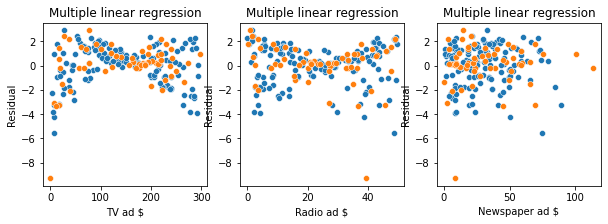

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
sns.scatterplot(x=train['TV'], y=residual_multi_train);
sns.scatterplot(x=test['TV'], y=residual_multi_test);

plt.xlabel('TV ad $')
plt.ylabel('Residual');
plt.title("Multiple linear regression");

plt.subplot(1,3,2)
sns.scatterplot(x=train['radio'], y=residual_multi_train);
sns.scatterplot(x=test['radio'], y=residual_multi_test);
plt.xlabel('Radio ad $')
plt.ylabel('Residual');
plt.title("Multiple linear regression");

plt.subplot(1,3,3)
sns.scatterplot(x=train['newspaper'], y=residual_multi_train);
sns.scatterplot(x=test['newspaper'], y=residual_multi_test);
plt.xlabel('Newspaper ad $')
plt.ylabel('Residual');
plt.title("Multiple linear regression");


### Comments on plot of residuals against features

The plot of residuals against newspaper ad sales doesn't have an obvious pattern, which suggests that the error term is not a function of newspaper ad sales. Our model seems to capture everything that is "learnable" from newspaper ad budgets.

But, we see a slight inverted U-shaped pattern in the residuals against the radio and TV ad budget features, which suggests that sales may actually be predicted in part by a non-linear transformation of those features.

## 5. Linear regression with interaction terms

Our multiple linear regression includes additive effects of all three types of advertising media. However, it does not include *interaction* effects, in which combining different types of advertising media together results in a bigger boost in sales than just the additive effect of the individual media.  The pattern in the residuals plots from parts (1) through (4) suggest that a model including an interaction effect may explain sales data better than a model including additive effects. Add four columns to your data frame:

* `newspaper` $\times$ `radio`
* `TV` $\times$ `radio`
* `newspaper` $\times$ `TV`
* `newspaper` $\times$ `radio` $\times$ `TV`


Then, train a linear regression model on all seven features: the three types of ad budgets, and the four interaction effects. Repeat the analysis of part (4) for the model including interaction effects. Comment on the results. Are the interaction effects helpful for explaining the effect of ads on product sales? Are there any patterns evident in the residual plots that suggest further opportunities for improving the model?


### Multiple linear regression with interaction terms

Note: Since `train` and `test` are "views" into our original data frame, you can't add a column to them using the `=` operator. For this assignment, it's fine to add the columns to the original data frame, then split it into training and test data again. For example:

```
df['TV_radio_interaction'] = df['TV']*df['radio']
df['TV_newspaper_interaction'] = df['TV']*df['newspaper']
df['newspaper_radio_interaction'] = df['newspaper']*df['radio']
df['all_interaction'] = df['newspaper']*df['radio']*df['TV']

train, test = train_test_split(df, test_size=0.3)
```

In [ ]:
train = train.assign( TV_radio_interaction = train['TV']*train['radio'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 38 to 182
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TV                    140 non-null    float64
 1   radio                 140 non-null    float64
 2   newspaper             140 non-null    float64
 3   sales                 140 non-null    float64
 4   TV_radio_interaction  140 non-null    float64
dtypes: float64(5)
memory usage: 6.6 KB


In [ ]:
test = test.copy()
test['TV_radio_interaction'] = test['TV']*test['radio']
test['TV_newspaper_interaction'] = test['TV']*test['newspaper']
test['newspaper_radio_interaction'] = test['newspaper']*test['radio']
test['all_interaction'] = test['newspaper']*test['radio']*test['TV']

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 93 to 194
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TV                           60 non-null     float64
 1   radio                        60 non-null     float64
 2   newspaper                    60 non-null     float64
 3   sales                        60 non-null     float64
 4   TV_radio_interaction         60 non-null     float64
 5   TV_newspaper_interaction     60 non-null     float64
 6   newspaper_radio_interaction  60 non-null     float64
 7   all_interaction              60 non-null     float64
dtypes: float64(8)
memory usage: 4.2 KB


In [ ]:
features = ['TV', 'radio', 'newspaper',
     'TV_radio_interaction', 'TV_newspaper_interaction',
     'newspaper_radio_interaction', 'all_interaction']
reg_inter = LinearRegression().fit(train[features], train['sales'])


### Intercept and coefficients

In [ ]:
pd.DataFrame({'features': features, 'coefficients':reg_inter.coef_ })

,features,coefficients
0,TV,0.020864
1,radio,0.022161
2,newspaper,0.010251
3,TV_radio_interaction,0.001136
4,TV_newspaper_interaction,-0.000050
5,newspaper_radio_interaction,0.000256
6,all_interaction,-0.000002


### MSE and R2

In [ ]:
y_pred_inter = reg_inter.predict(test[features])
r2_inter = 1-np.mean( (y_pred_inter - test['sales'])**2 /
    np.std(test['sales'])**2 )
mse_inter = np.mean( (y_pred_inter - test['sales'])**2)


In [ ]:
print("Multiple regression with interaction, test R2:  ", r2_inter)
print("Multiple regression with interaction, test MSE: ", mse_inter)

Multiple regression with interaction, test R2:   0.9731274796388478
Multiple regression with interaction, test MSE:  0.7225091383784659


In [ ]:
y_pred_inter_train = reg_inter.predict(train[features])
r2_inter_train = 1-np.mean( (y_pred_inter_train - train['sales'])**2 /
    np.std(train['sales'])**2 )
mse_inter_train = np.mean( (y_pred_inter_train - train['sales'])**2)


In [ ]:
print("Multiple regression with interaction, training R2:  ", r2_inter_train)
print("Multiple regression with interaction, training MSE: ", mse_inter_train)

Multiple regression with interaction, training R2:   0.9655079228716712
Multiple regression with interaction, training MSE:  0.9235883659457589


### Comment on multiple linear regression with interaction terms results

The multiple linear regression with interaction terms is much more effective at predicting sales (higher R2) than the multiple linear regression with only the linear effect of each feature.

In particular, the coefficient for the TV-radio interaction suggests that the joint effect of TV and radio ads is greater than just the effect of TV ads plus the effect of radio ads.

(Note, however, that the coefficient of the interaction term for the product of two features can't be directly compared to the coefficient for a single feature. The interaction term is in units of thousands of dollars squared, while the single feature is in units of thousands of dollars.)

### Plot of predicted vs. actual sales

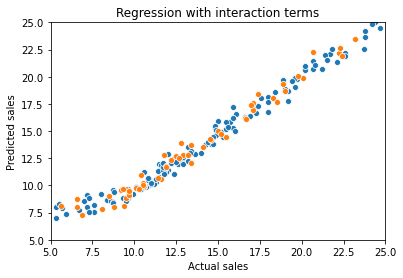

In [ ]:
sns.scatterplot(data=train, x="sales", y=reg_inter.predict(train[features]));
sns.scatterplot(data=test, x="sales", y=reg_inter.predict(test[features]));

plt.ylabel('Predicted sales');
plt.ylim(5,25);
plt.xlabel('Actual sales');
plt.xlim(5,25);

plt.title("Regression with interaction terms");


### Comment on predicted vs. actual sales

For a model that fits the data very well, the plot of predicted vs. actual sales should show points along the line $y=x$.

For our multiple regresion model with interaction terms, the fit seems mostly good, but it's not as tight a fit on the bottom left (when actual sales are small, the model seems to over-estimate sales).

### Compute residuals

In [ ]:
residual_inter_train = train['sales'] - reg_inter.predict(train[features])
residual_inter_test = test['sales'] - reg_inter.predict(test[features])

### Mean residuals

In [ ]:
print("Mean of residuals for training data: ", np.mean(residual_inter_train))
print("Mean of residuals for test data: ", np.mean(residual_inter_test))

Mean of residuals for training data:  1.5860328923216523e-15
Mean of residuals for test data:  -0.0736020114689546


### Comment on residuals

For a well-fitted model, the mean of the residuals should be close to 0, indicating that *on average*, the model does not consistently over-estimate or under-estimate the target variable.

Here, the mean of residuals is close to zero, so it doesn't suggest any obvious problem with our model.

### Plot of residuals against actual sales

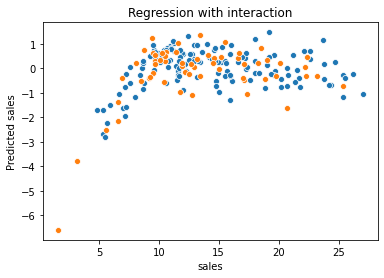

In [ ]:
sns.scatterplot(data=train, x="sales", y=residual_inter_train);
sns.scatterplot(data=test, x="sales", y=residual_inter_test);

plt.ylabel('Predicted sales');
plt.title("Regression with interaction");


### Comments on plot of residuals against actual sales

If a model captures everything "learnable" about the target variable, the residual plot should have no obvious pattern, since the error term will just be due to random noise that is not "learnable". A pattern in the residuals suggests that the model does *not* capture everything "learnable" about the target variable.

Here, we see a pattern in which the residuals are more strongly negative (model tends to over-estimate sales) for samples with low sales.

### Plot of residuals against features

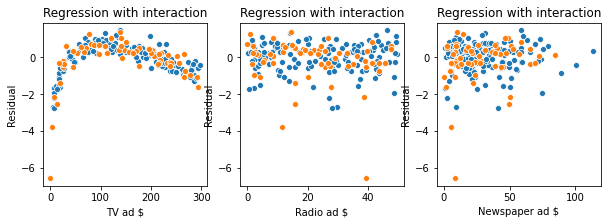

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
sns.scatterplot(x=train['TV'], y=residual_inter_train);
sns.scatterplot(x=test['TV'], y=residual_inter_test);
plt.xlabel('TV ad $')
plt.ylabel('Residual');
plt.title("Regression with interaction");

plt.subplot(1,3,2)
sns.scatterplot(x=train['radio'], y=residual_inter_train);
sns.scatterplot(x=test['radio'], y=residual_inter_test);
plt.xlabel('Radio ad $')
plt.ylabel('Residual');
plt.title("Regression with interaction");

plt.subplot(1,3,3)
sns.scatterplot(x=train['newspaper'], y=residual_inter_train);
sns.scatterplot(x=test['newspaper'], y=residual_inter_test);
plt.xlabel('Newspaper ad $')
plt.ylabel('Residual');
plt.title("Regression with interaction");


### Comments on plot of residuals against features

The plot of residuals against newspaper ad sales and radio ad sales doesn't have much of an obvious pattern, which suggests that the error term is not a function of newspaper ad sales. Our model seems to capture everything that is "learnable" from those two features.

But, we see a non-linear pattern in the residuals against the TV ad budget feature, which suggests that sales may actually be predicted in part by a non-linear transformation of that feature.

## Bonus: multiple linear regression with interaction term and transformed feature

In [ ]:
train['TV_transformed'] = np.log(train['TV'])
test['TV_transformed']  = np.log(test['TV'])

In [ ]:
features = ['TV', 'radio', 'newspaper',
     'TV_radio_interaction', 'TV_newspaper_interaction',
     'newspaper_radio_interaction', 'all_interaction',
     'TV_transformed']
reg_bonus = LinearRegression().fit(train[features], train['sales'])
y_pred_bonus = reg_bonus.predict(test[features])
r2_bonus = 1-np.mean( (y_pred_bonus - test['sales'])**2 / np.std(test['sales'])**2 )

In [ ]:
print("Multiple regression with interaction and transformed feature, R2: ", r2_bonus)

Multiple regression with interaction and transformed feature, R2:  0.9965120443075646


In [ ]:
pd.DataFrame({'features': features, 'coefficients':reg_bonus.coef_ })

,features,coefficients
0,TV,-0.001041
1,radio,0.035337
2,newspaper,-0.009957
3,TV_radio_interaction,0.001081
4,TV_newspaper_interaction,0.000057
5,newspaper_radio_interaction,0.000344
6,all_interaction,-0.000002
7,TV_transformed,1.951634


(Note that we can't directly compare the coefficient of the transformed TV feature to the coefficient of an interaction term or to the coefficient of a single feature, again because the units are different.)

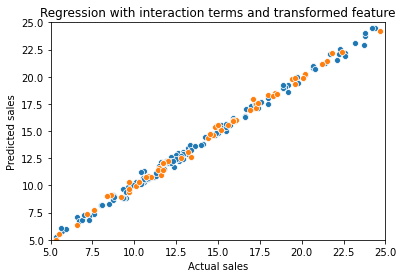

In [ ]:
sns.scatterplot(data=train, x="sales", y=reg_bonus.predict(train[features]));
sns.scatterplot(data=test, x="sales", y=reg_bonus.predict(test[features]));

plt.ylabel('Predicted sales');
plt.ylim(5,25);
plt.xlabel('Actual sales');
plt.xlim(5,25);

plt.title("Regression with interaction terms and transformed feature");


In [ ]:
residual_bonus_train = train['sales'] - reg_bonus.predict(train[features])
residual_bonus_test = test['sales'] - reg_bonus.predict(test[features])
np.mean(residual_bonus_test)
np.mean(residual_bonus_train)

1.7700127078309639e-15

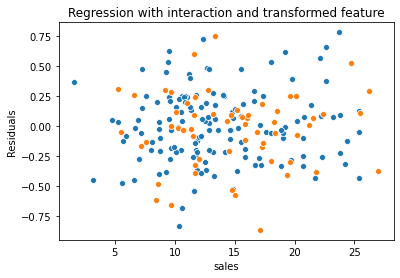

In [ ]:
sns.scatterplot(data=train, x="sales", y=residual_bonus_train);
sns.scatterplot(data=test, x="sales", y=residual_bonus_test);

plt.ylabel('Residuals');
plt.title("Regression with interaction and transformed feature");

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
sns.scatterplot(x=train['TV'], y=residual_bonus_train);
sns.scatterplot(x=test['TV'], y=residual_bonus_test);
plt.xlabel('TV ad $')
plt.ylabel('Residual');
plt.title("Regression with interaction \n and transformed feature");

plt.subplot(1,3,2)
sns.scatterplot(x=train['radio'], y=residual_bonus_train);
sns.scatterplot(x=test['radio'], y=residual_bonus_test);
plt.xlabel('Radio ad $')
plt.ylabel('Residual');
plt.title("Regression with interaction \n and transformed feature");

plt.subplot(1,3,3)
sns.scatterplot(x=train['newspaper'], y=residual_bonus_train);
sns.scatterplot(x=test['newspaper'], y=residual_bonus_test);
plt.xlabel('Newspaper ad $')
plt.ylabel('Residual');
plt.title("Regression with interaction \n and transformed feature");


NameError: ignored

### Comments on the "bonus" section

With the non-linear transformation of the TV ad budget included, the model is more effective at predicting sales. Also, we see no obvious pattern in the residuals, which suggests that our model does about as well as we could expect - we can't see anything "learnable" in the remaining error of our model.

